<a href="https://colab.research.google.com/github/SergeyHSE/LogRegAndNLP.github.io/blob/main/LogRegCardiotocography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the data from the link: https://archive.ics.uci.edu/ml/datasets/cardiotocography. The data are located in the Data sheet. The features we are considering are listed in the Description sheet in the Features column. The target label is the NSP column. For our analysis, we will not consider data whose target label is Suspect.

In [1]:
import pandas as pd
import requests
from io import BytesIO
import zipfile

url = "https://archive.ics.uci.edu/static/public/193/cardiotocography.zip"
response = requests.get(url)

with zipfile.ZipFile(BytesIO(response.content)) as z:

    with z.open("CTG.xls") as f:

        df = pd.read_excel(f, sheet_name="Data", skiprows=[0])

In [ ]:
df.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0


In [2]:
selected_features = [
    'LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV',
    'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros',
    'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP'
]

data = df[selected_features]

In [ ]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,4.0,0.0,4.0,2.0,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,2.0,0.0,5.0,2.0,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,2.0,0.0,6.0,2.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,4.0,0.0,5.0,0.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,4.0,0.0,4.0,2.0,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,2.0,0.0,5.0,2.0,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,2.0,0.0,6.0,2.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,4.0,0.0,5.0,0.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,140.0,1.0,0.0,9.0,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,1.0,1.0,5.0,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = data.iloc[:-3]
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,4.0,0.0,4.0,2.0,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,2.0,0.0,5.0,2.0,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,2.0,0.0,6.0,2.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,4.0,0.0,5.0,0.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.0,0.0,6.0,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,1.0,0.0,9.0,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,1.0,0.0,7.0,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,1.0,0.0,9.0,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

In [4]:
X_features = selected_features[:-1]
X_features

['LB',
 'AC',
 'FM',
 'UC',
 'DL',
 'DS',
 'DP',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'Width',
 'Min',
 'Max',
 'Nmax',
 'Nzeros',
 'Mode',
 'Mean',
 'Median',
 'Variance',
 'Tendency']

Conduct a visual analysis of the data. What features best separate the classes? What feature transformations should you perform?

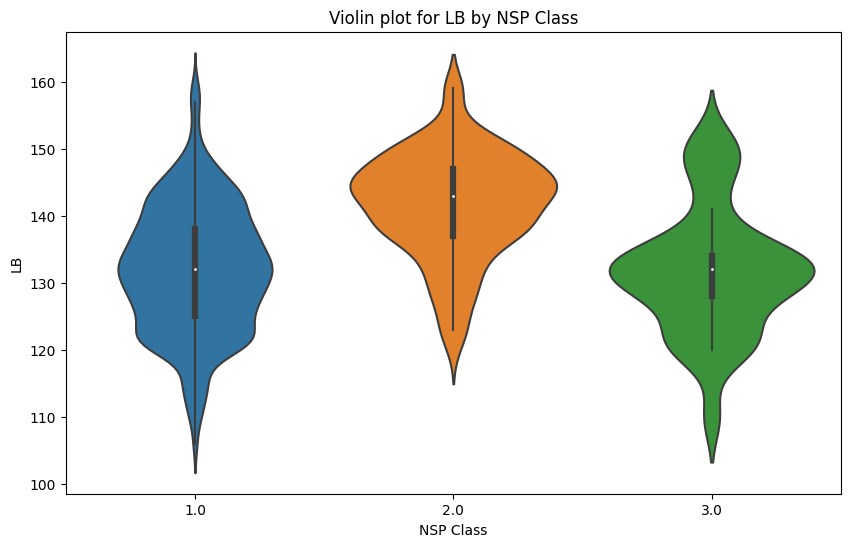

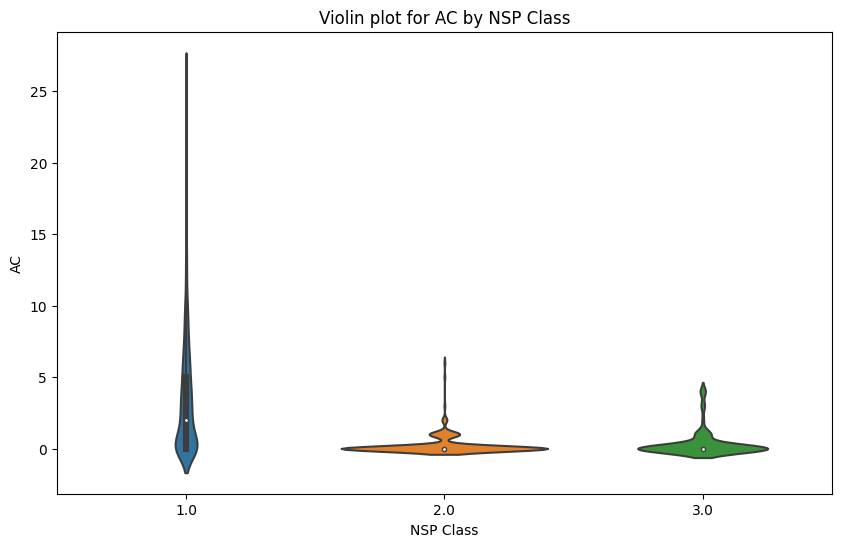

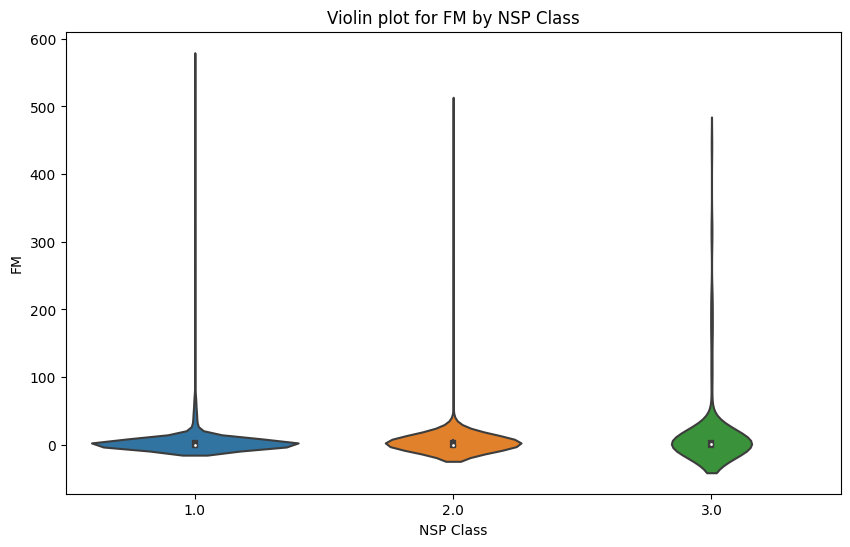

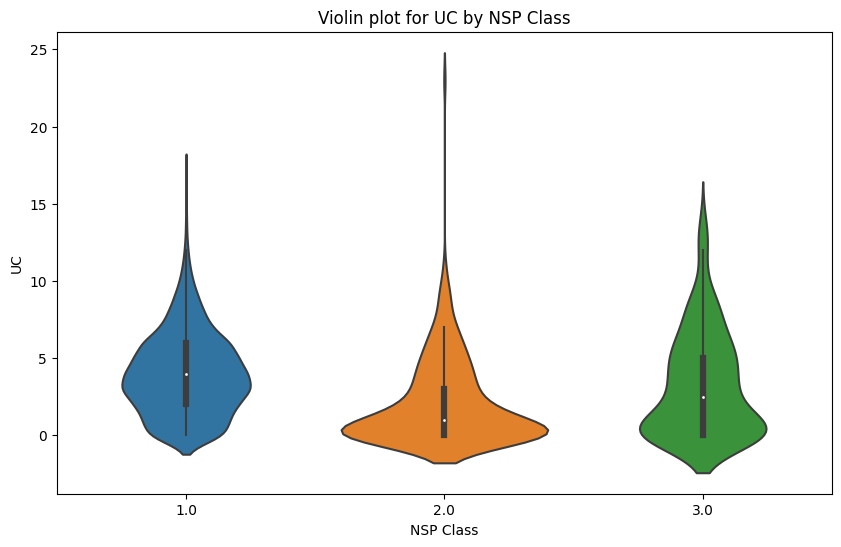

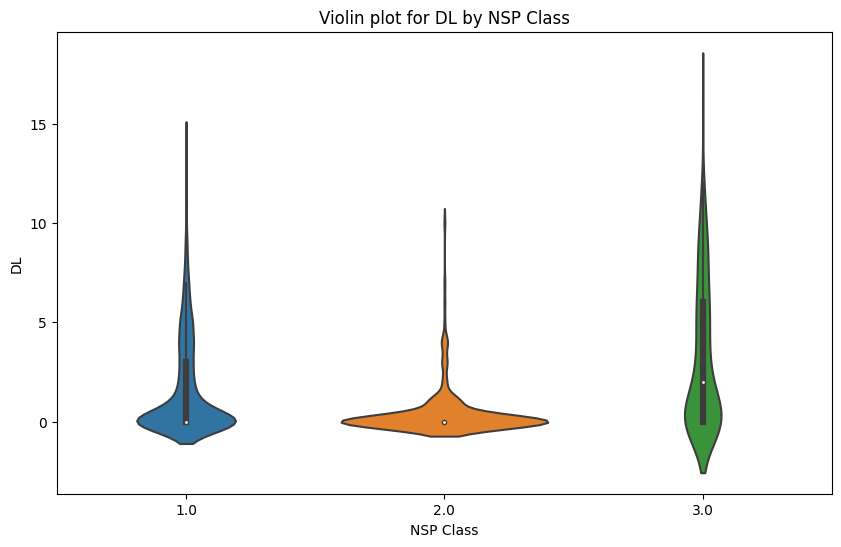

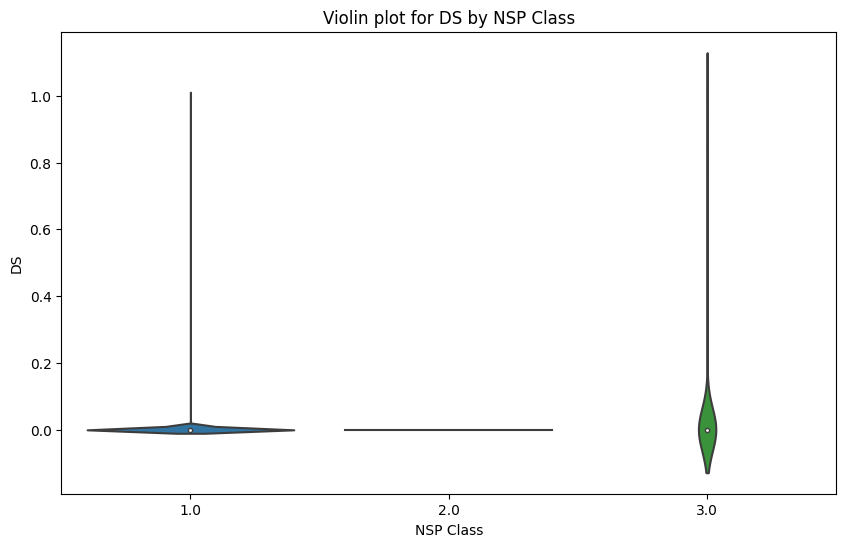

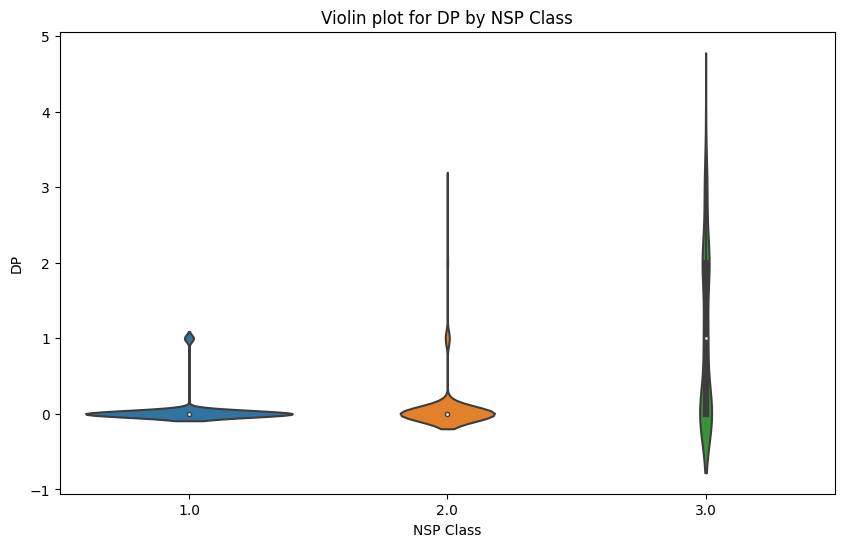

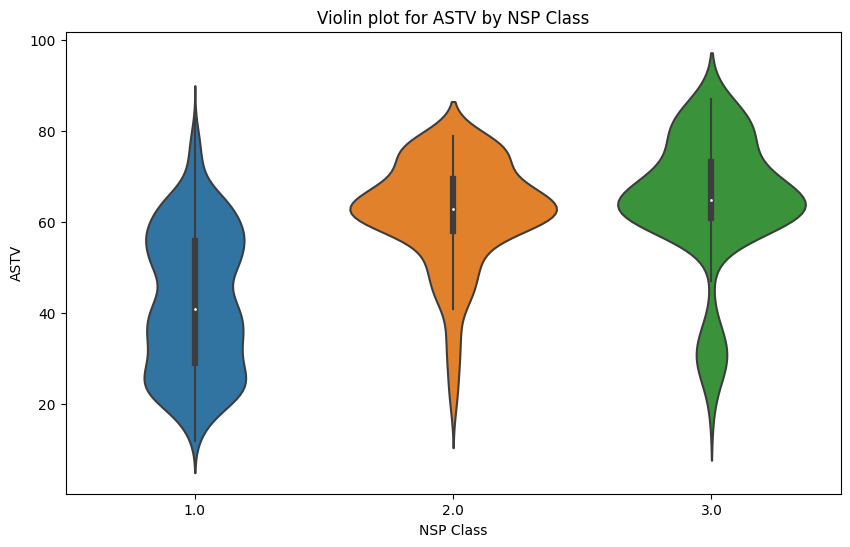

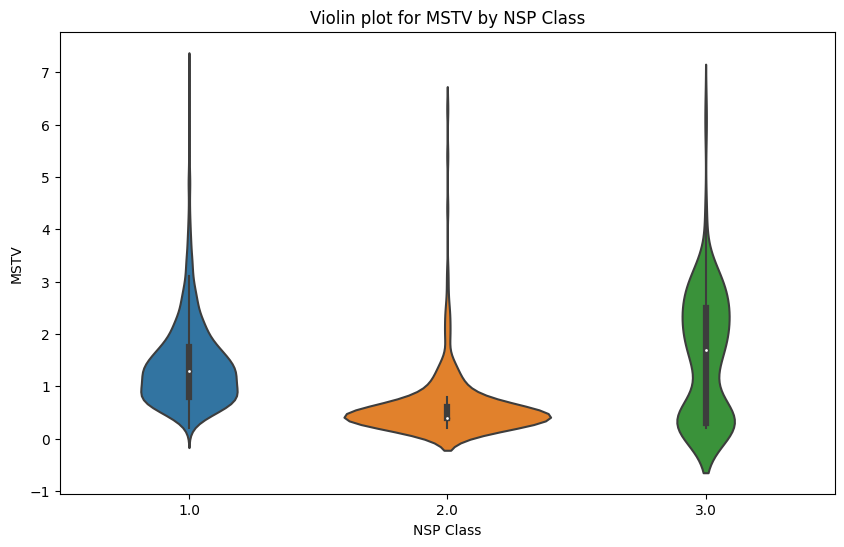

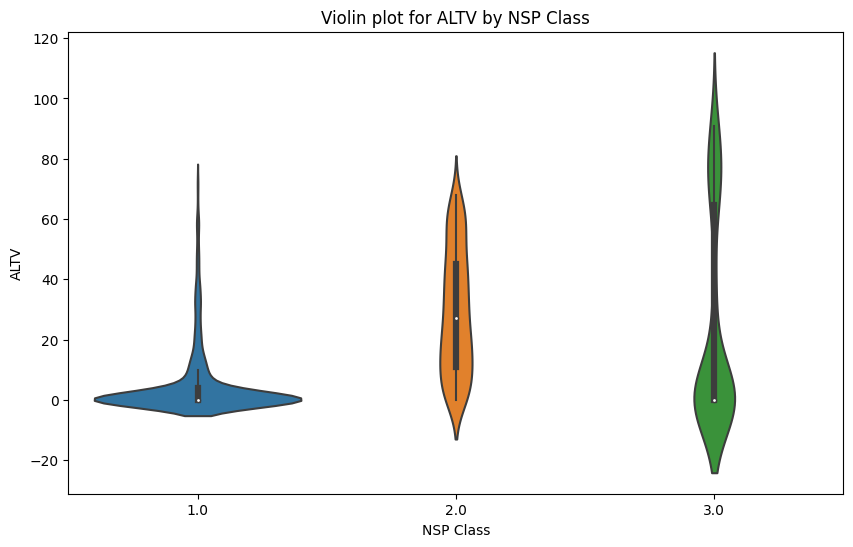

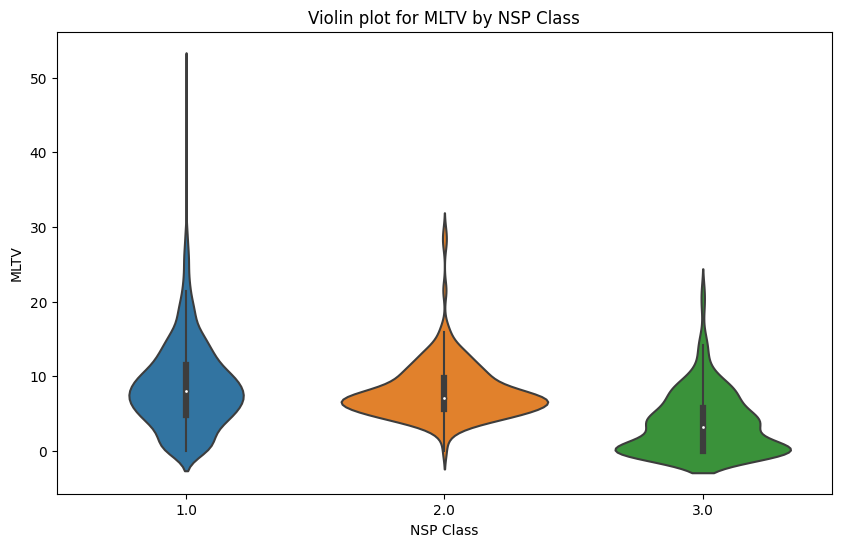

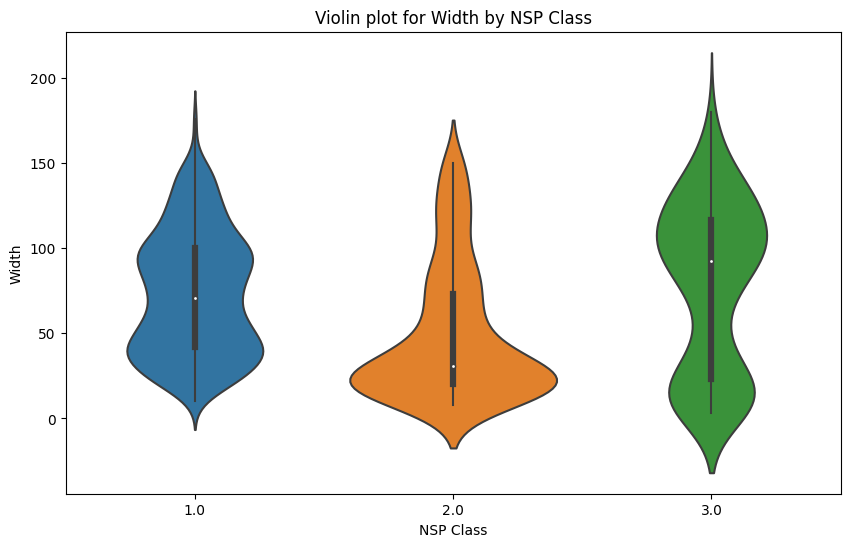

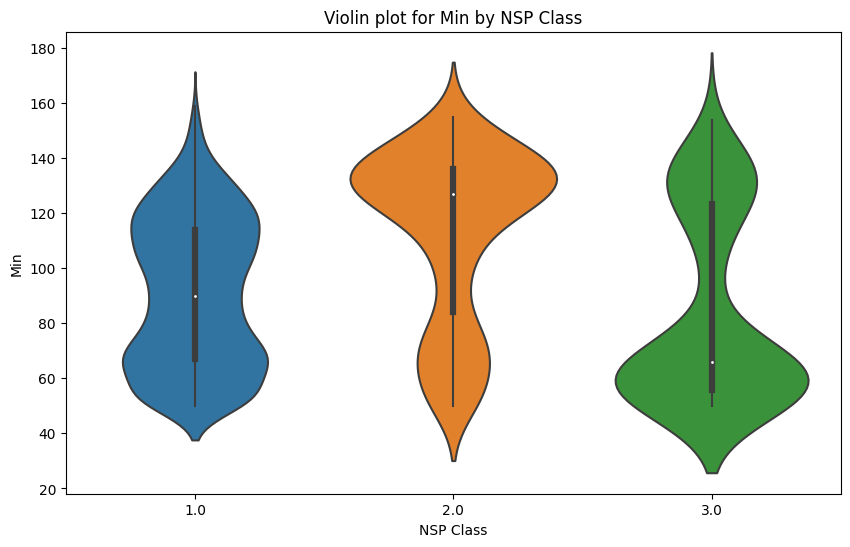

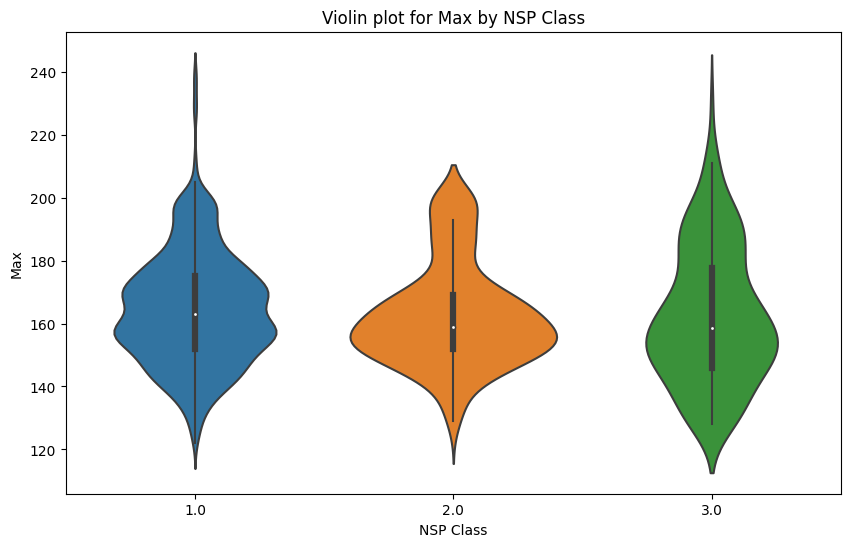

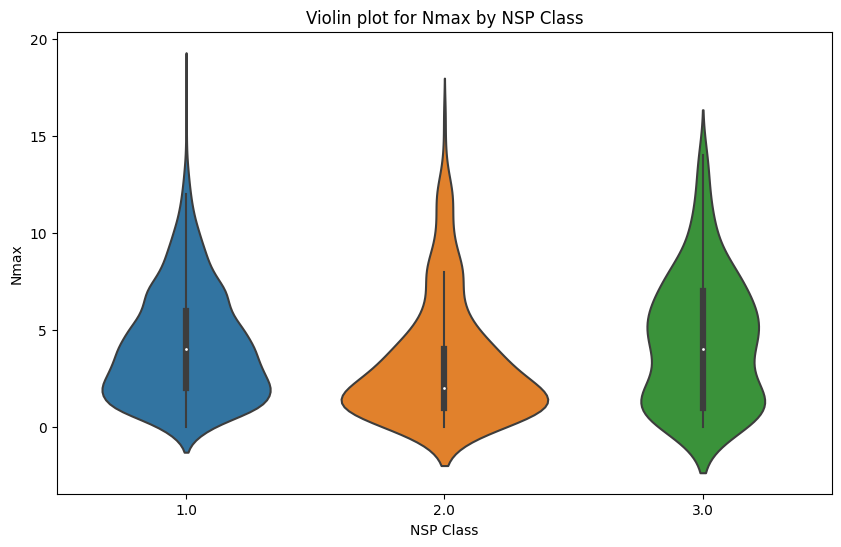

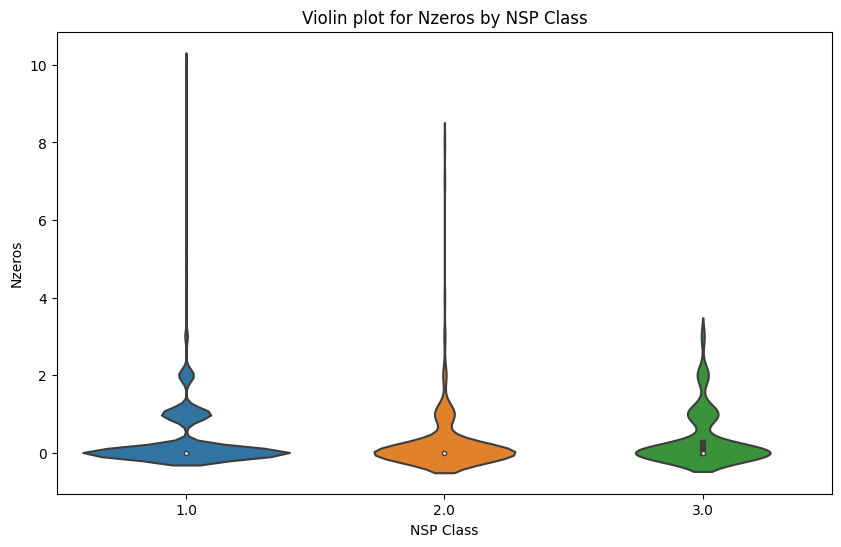

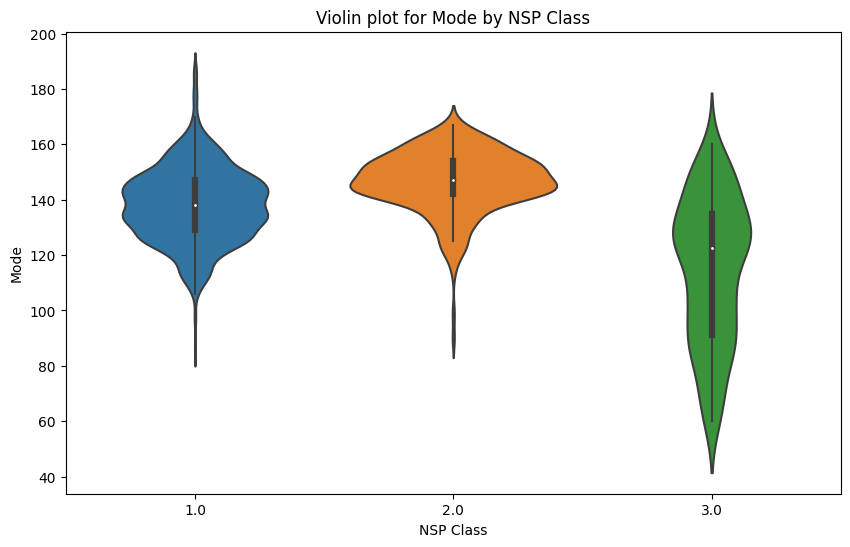

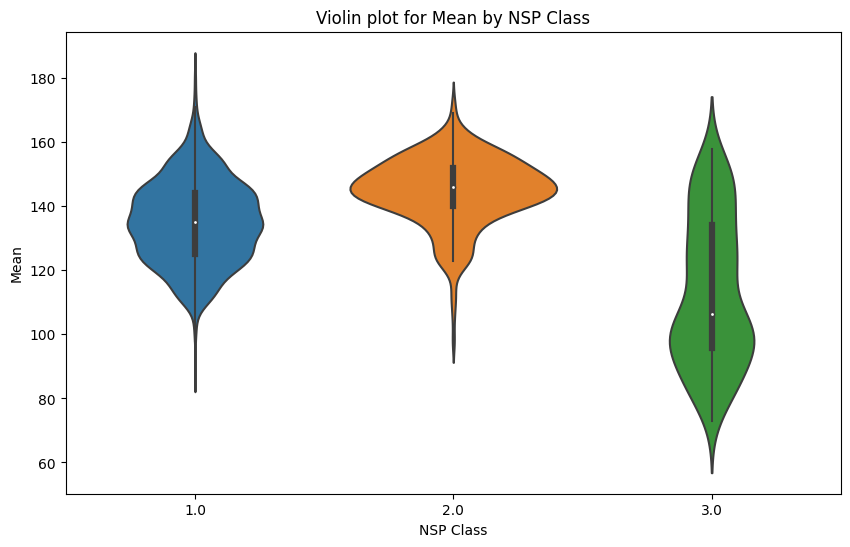

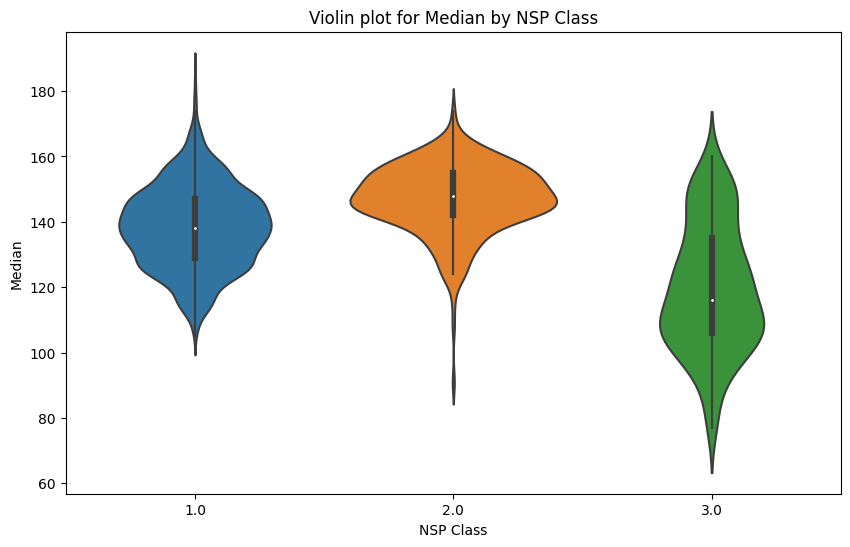

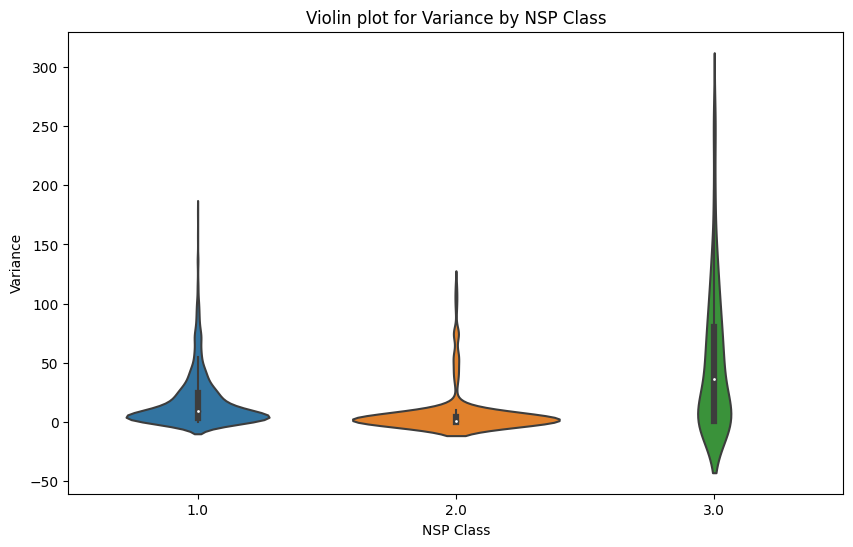

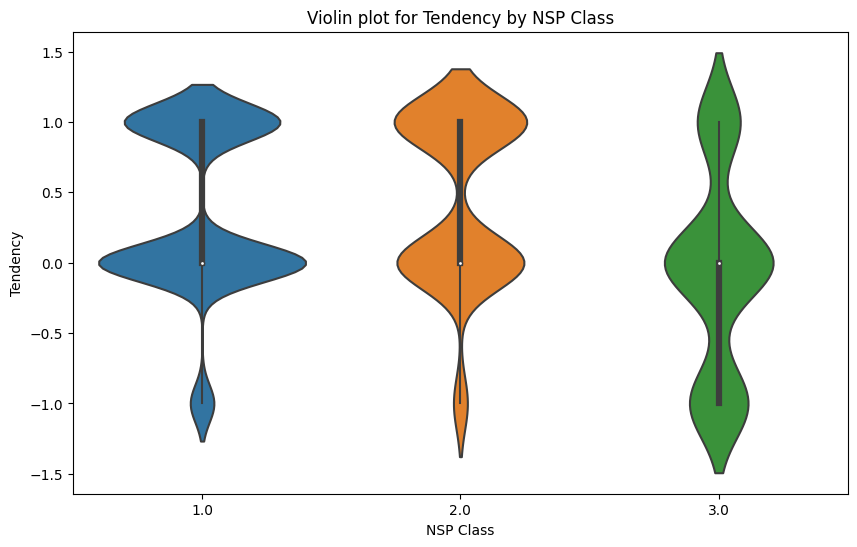

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for feature in X_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='NSP', y=feature, data=data)
    plt.title(f'Violin plot for {feature} by NSP Class')
    plt.xlabel('NSP Class')
    plt.ylabel(feature)
    plt.show()

The visual graph showed that features such as baseline fetal heart rate (LB), uterine contractions (US), mild decelerations (DL), ASTV (percent of fetal heartbeat time), mean of fetal heartbeats (MSTV), percent of time with abnormal fetal heartbeats (ALTV), histogram width (width) and min values best separated the classes.

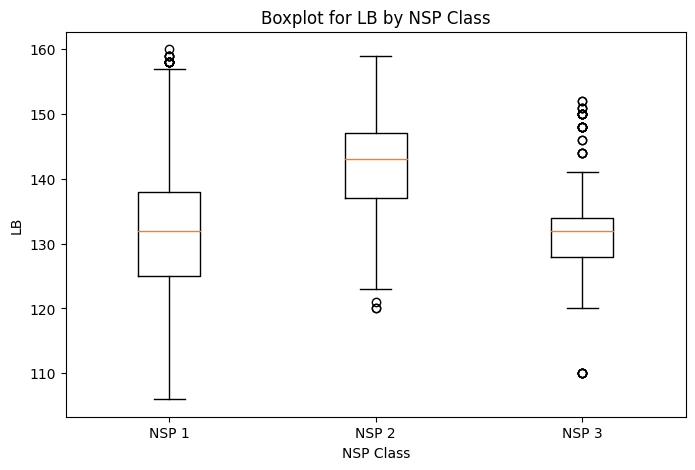

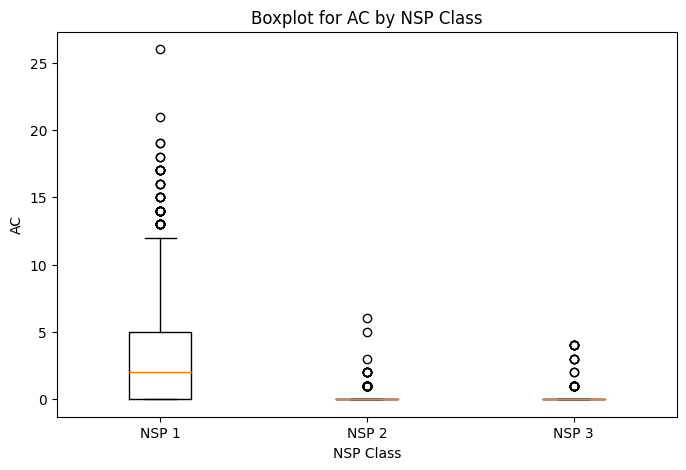

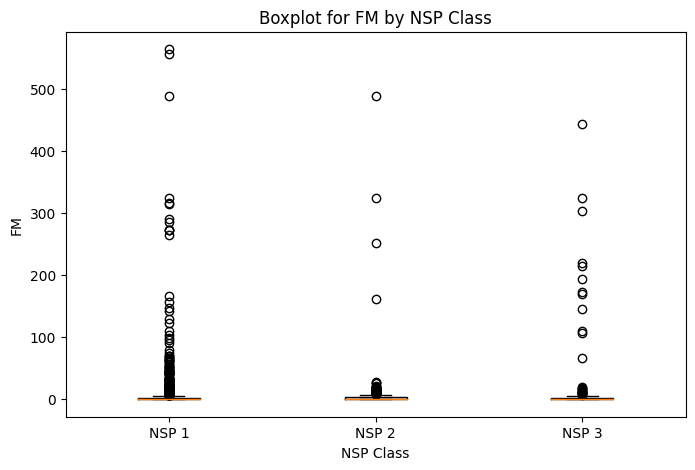

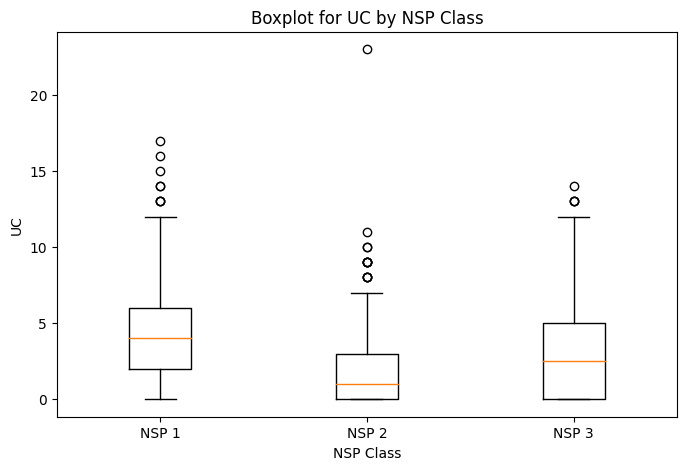

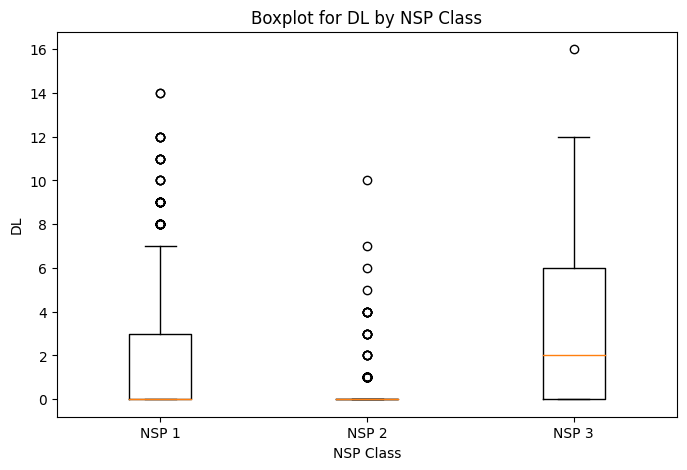

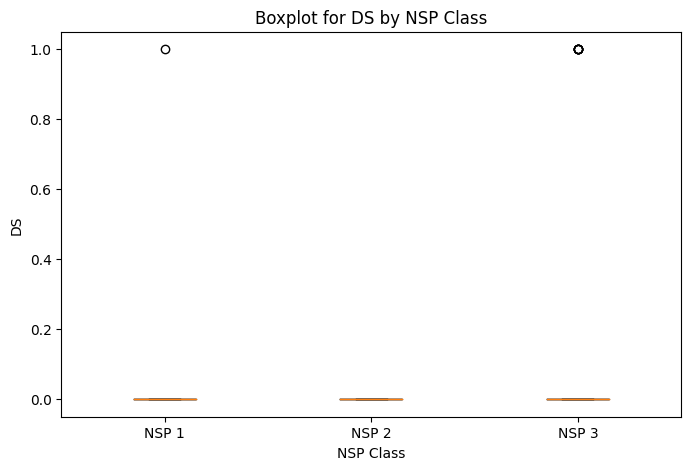

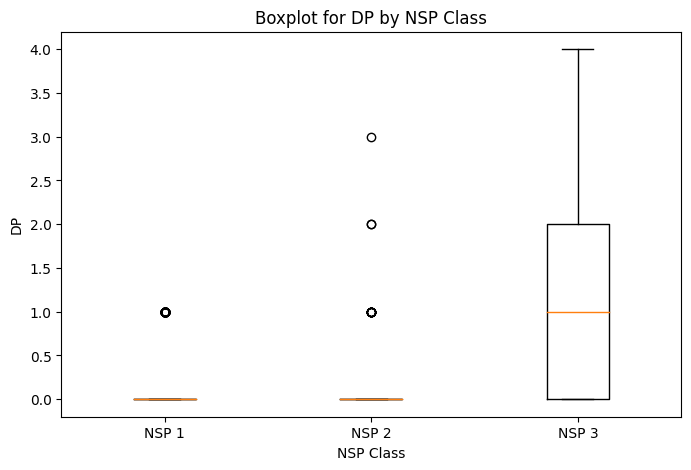

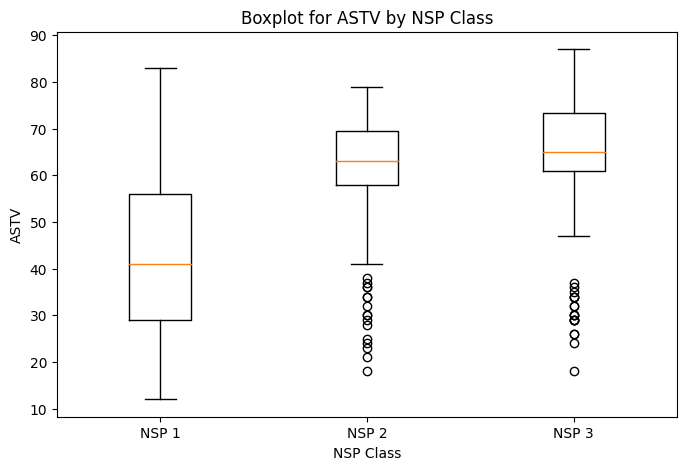

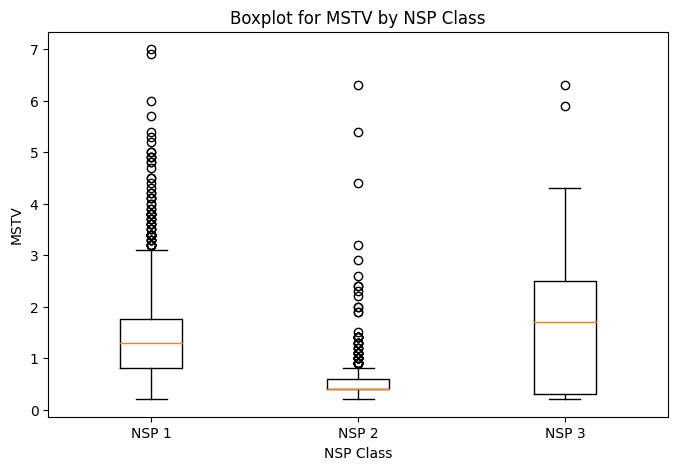

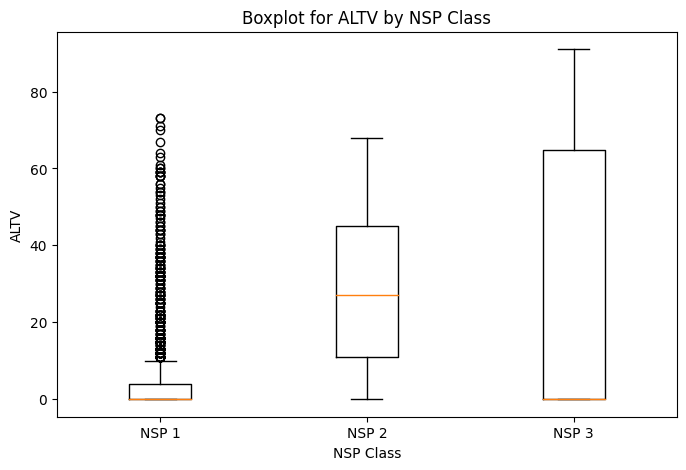

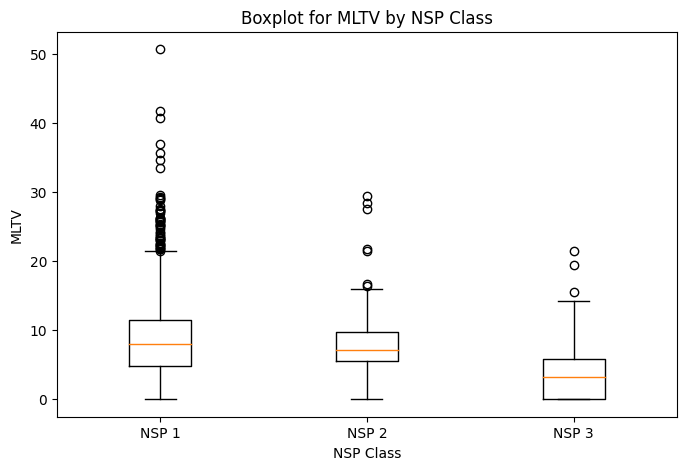

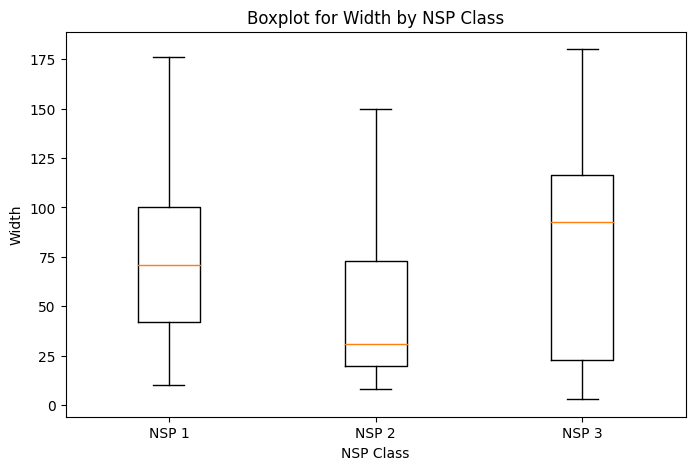

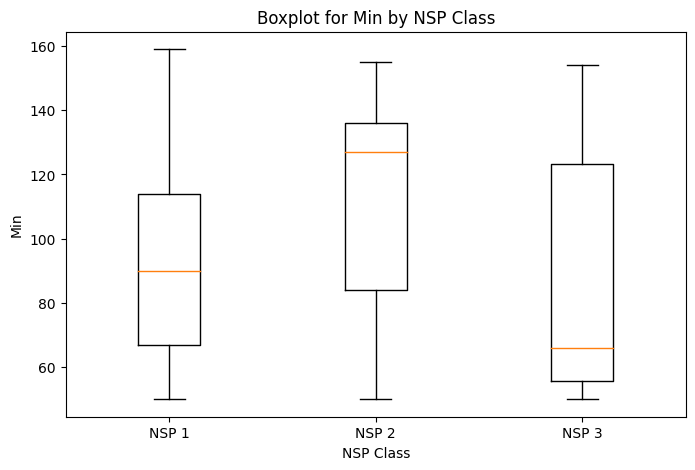

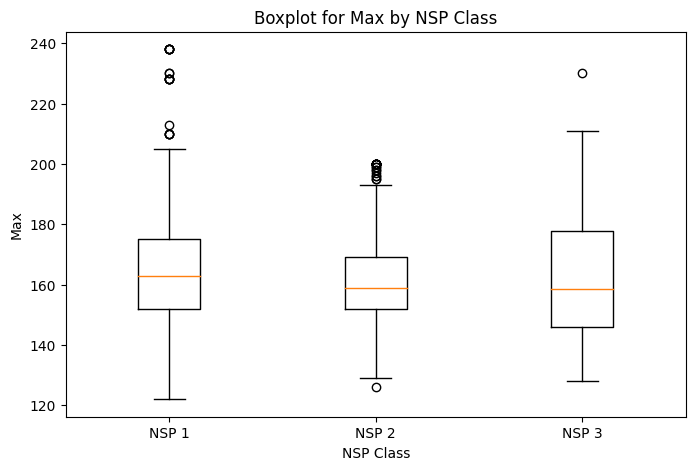

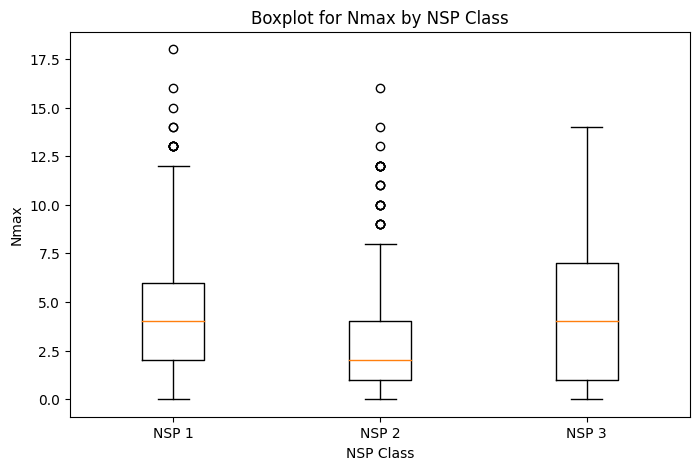

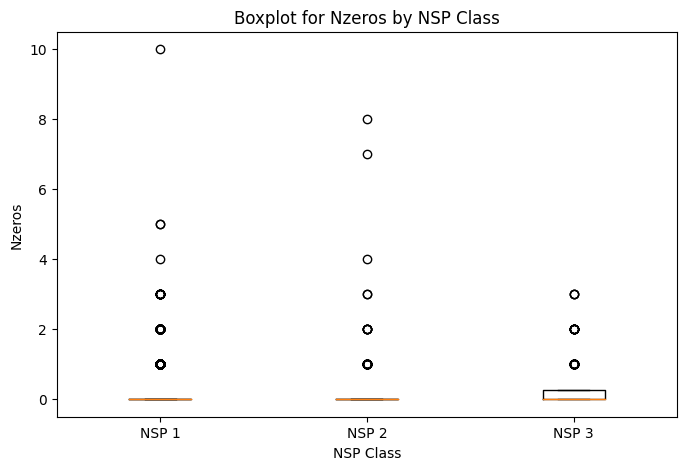

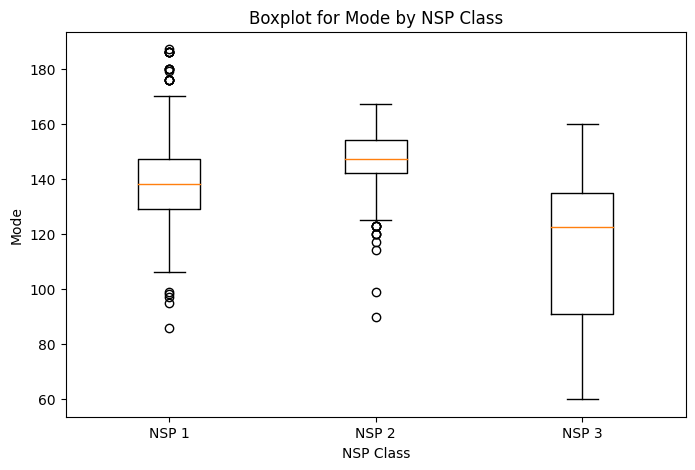

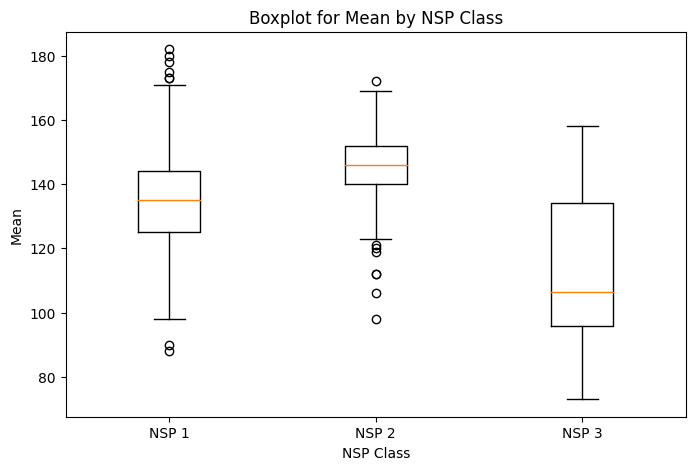

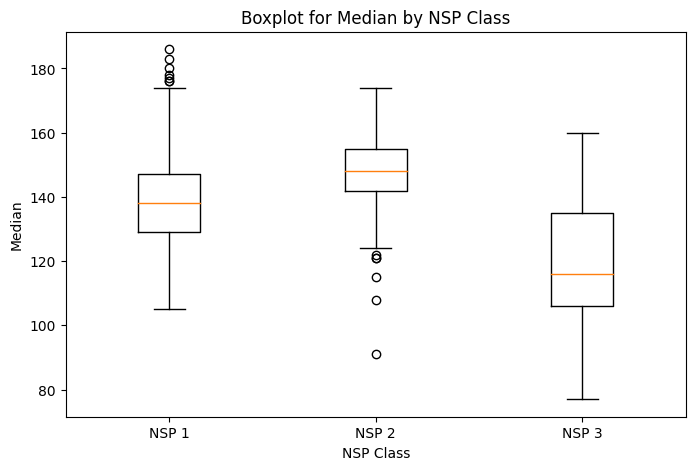

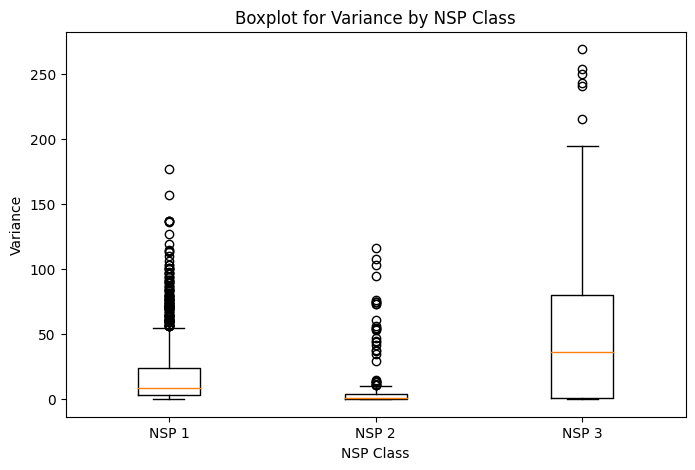

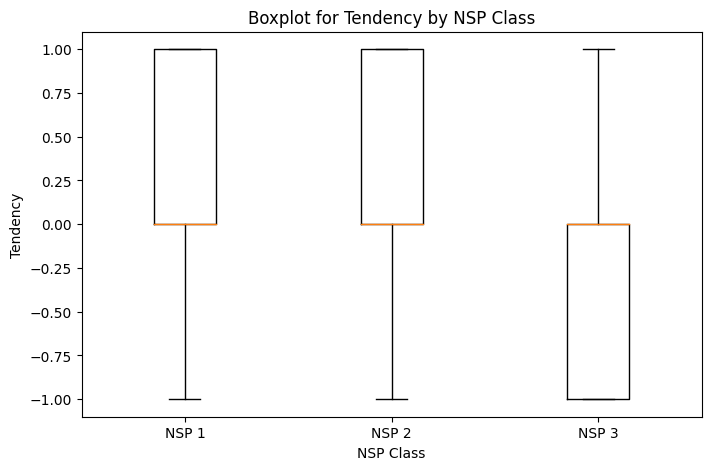

In [ ]:
for feature in X_features:
    plt.figure(figsize=(8, 5))
    plt.title(f'Boxplot for {feature} by NSP Class')
    plt.boxplot([data[data['NSP'] == 1][feature], data[data['NSP'] == 2][feature], data[data['NSP'] == 3][feature]], labels=['NSP 1', 'NSP 2', 'NSP 3'])
    plt.xlabel('NSP Class')
    plt.ylabel(feature)
    plt.show()

From the figures it can be seen that some features have strong outliers. Removing the outliers completely would result in the loss of most of the data. We can use z-score to clean up our data a bit, but of course this will not improve the situation much. So we should use data normalization. And after that we can build boxplot again to see if the situation has improved. Logarithmization will not help in this case, because we have a lot of zero and negative values.

In [5]:
NSP_count = data['NSP'].value_counts()
NSP_count

1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64

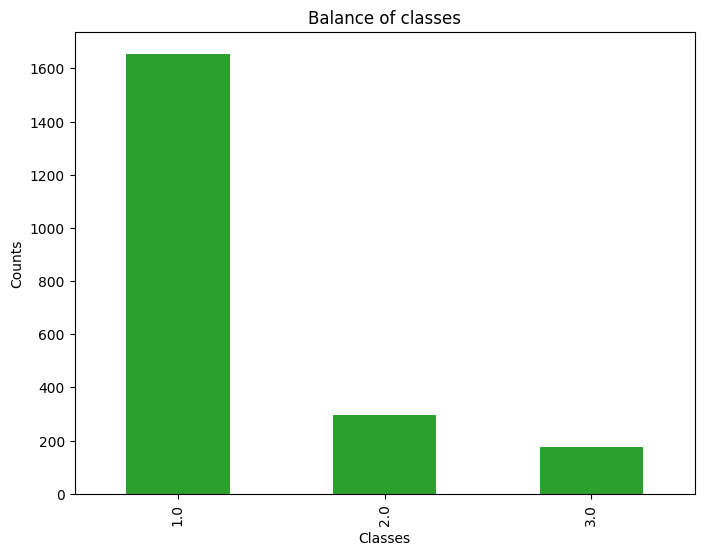

In [ ]:
plt.figure(figsize=(8, 6))
NSP_count.plot(kind='bar', color='tab:green')
plt.title('Balance of classes')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()

The figure shows that we have a strong unbalance of classes. We can apply undersampling by removing some variables from the first class and see how it will change the situation.

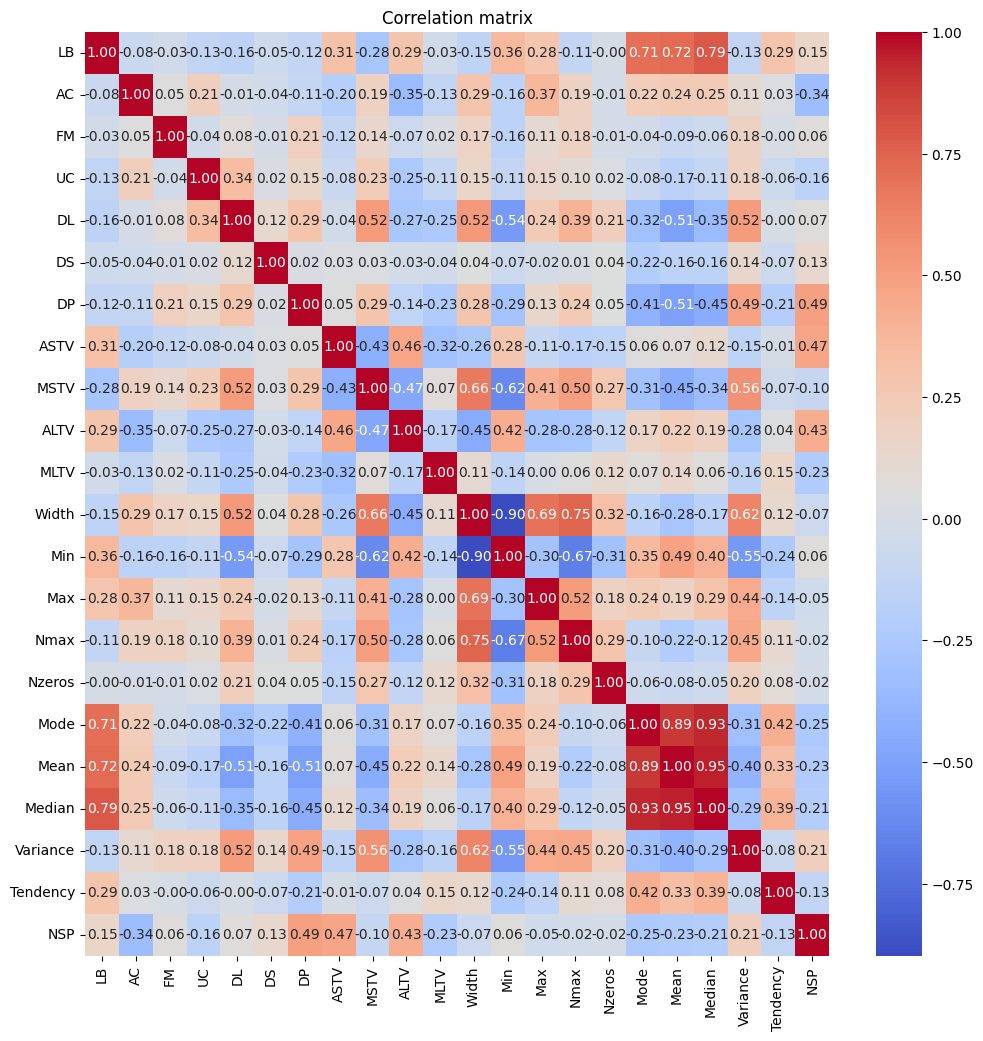

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

The correlation matrix shows that there is a strong correlation between mean, median and mode, which is quite natural. We can either remove these features or use regularization.

In [44]:
X = data.drop('NSP', axis=1)
y = data['NSP']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 21), (426, 21), (1700,), (426,))

In [45]:
import statsmodels.api as sm
model = sm.MNLogit(y_train, X_train)
result = model.fit(method='bfgs')

print(result.summary())

         Current function value: 0.249820
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 46
                          MNLogit Regression Results                          
Dep. Variable:                    NSP   No. Observations:                 1700
Model:                        MNLogit   Df Residuals:                     1660
Method:                           MLE   Df Model:                           38
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                  0.6318
Time:                        12:05:59   Log-Likelihood:                -424.69
converged:                      False   LL-Null:                       -1153.4
Covariance Type:            nonrobust   LLR p-value:                1.850e-281
     NSP=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LB            -0.2259      0.034     -6.574      0.000      -0.293      -0.1

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

feature_names = X_train.columns.tolist()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

In [18]:
# Let's try to make class more balance
from sklearn.utils import resample

class_1 = data[data['NSP'] == 1]
class_2 = data[data['NSP'] == 2]
class_3 = data[data['NSP'] == 3]

class_size = len(class_2)

undersampled_class_1 = resample(class_1, replace=False, n_samples=class_size, random_state=42)
undersampled_class_1

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1308,138.0,3.0,0.0,7.0,5.0,0.0,0.0,28.0,1.3,9.0,...,85.0,175.0,6.0,0.0,144.0,134.0,138.0,31.0,0.0,1.0
95,148.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.5,7.0,...,135.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,1.0
878,136.0,1.0,0.0,4.0,0.0,0.0,0.0,39.0,0.9,8.0,...,107.0,154.0,1.0,0.0,138.0,139.0,139.0,2.0,0.0,1.0
1103,122.0,7.0,0.0,3.0,0.0,0.0,0.0,19.0,2.3,0.0,...,104.0,157.0,2.0,1.0,125.0,127.0,128.0,8.0,0.0,1.0
40,114.0,10.0,69.0,8.0,1.0,0.0,0.0,28.0,2.2,0.0,...,55.0,153.0,7.0,1.0,119.0,119.0,120.0,13.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,140.0,0.0,3.0,4.0,3.0,0.0,0.0,63.0,1.2,3.0,...,65.0,159.0,2.0,2.0,140.0,133.0,140.0,22.0,1.0,1.0
950,142.0,4.0,0.0,6.0,0.0,0.0,0.0,34.0,1.1,0.0,...,94.0,161.0,5.0,1.0,151.0,146.0,149.0,8.0,1.0,1.0
858,142.0,0.0,0.0,4.0,0.0,0.0,0.0,41.0,0.8,0.0,...,126.0,158.0,0.0,0.0,151.0,146.0,148.0,5.0,1.0,1.0
587,120.0,4.0,23.0,5.0,0.0,0.0,0.0,36.0,1.5,0.0,...,62.0,174.0,6.0,0.0,119.0,129.0,125.0,42.0,0.0,1.0


In [19]:
balanced_data = pd.concat([undersampled_class_1, class_2, class_3])
balanced_data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1308,138.0,3.0,0.0,7.0,5.0,0.0,0.0,28.0,1.3,9.0,...,85.0,175.0,6.0,0.0,144.0,134.0,138.0,31.0,0.0,1.0
95,148.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.5,7.0,...,135.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,1.0
878,136.0,1.0,0.0,4.0,0.0,0.0,0.0,39.0,0.9,8.0,...,107.0,154.0,1.0,0.0,138.0,139.0,139.0,2.0,0.0,1.0
1103,122.0,7.0,0.0,3.0,0.0,0.0,0.0,19.0,2.3,0.0,...,104.0,157.0,2.0,1.0,125.0,127.0,128.0,8.0,0.0,1.0
40,114.0,10.0,69.0,8.0,1.0,0.0,0.0,28.0,2.2,0.0,...,55.0,153.0,7.0,1.0,119.0,119.0,120.0,13.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,128.0,0.0,2.0,7.0,5.0,0.0,2.0,65.0,2.6,0.0,...,63.0,192.0,6.0,0.0,103.0,92.0,114.0,28.0,0.0,3.0
2037,128.0,0.0,2.0,9.0,6.0,0.0,3.0,66.0,2.7,0.0,...,63.0,192.0,4.0,0.0,105.0,89.0,112.0,21.0,0.0,3.0
2038,128.0,0.0,2.0,8.0,6.0,0.0,2.0,65.0,2.5,0.0,...,63.0,192.0,6.0,0.0,104.0,94.0,115.0,28.0,0.0,3.0
2039,128.0,0.0,3.0,8.0,7.0,0.0,2.0,65.0,2.5,0.0,...,63.0,192.0,5.0,0.0,114.0,97.0,116.0,25.0,0.0,3.0


In [20]:
balanced_data.reset_index(drop=True, inplace=True)
balanced_data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,138.0,3.0,0.0,7.0,5.0,0.0,0.0,28.0,1.3,9.0,...,85.0,175.0,6.0,0.0,144.0,134.0,138.0,31.0,0.0,1.0
1,148.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.5,7.0,...,135.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,1.0
2,136.0,1.0,0.0,4.0,0.0,0.0,0.0,39.0,0.9,8.0,...,107.0,154.0,1.0,0.0,138.0,139.0,139.0,2.0,0.0,1.0
3,122.0,7.0,0.0,3.0,0.0,0.0,0.0,19.0,2.3,0.0,...,104.0,157.0,2.0,1.0,125.0,127.0,128.0,8.0,0.0,1.0
4,114.0,10.0,69.0,8.0,1.0,0.0,0.0,28.0,2.2,0.0,...,55.0,153.0,7.0,1.0,119.0,119.0,120.0,13.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,128.0,0.0,2.0,7.0,5.0,0.0,2.0,65.0,2.6,0.0,...,63.0,192.0,6.0,0.0,103.0,92.0,114.0,28.0,0.0,3.0
762,128.0,0.0,2.0,9.0,6.0,0.0,3.0,66.0,2.7,0.0,...,63.0,192.0,4.0,0.0,105.0,89.0,112.0,21.0,0.0,3.0
763,128.0,0.0,2.0,8.0,6.0,0.0,2.0,65.0,2.5,0.0,...,63.0,192.0,6.0,0.0,104.0,94.0,115.0,28.0,0.0,3.0
764,128.0,0.0,3.0,8.0,7.0,0.0,2.0,65.0,2.5,0.0,...,63.0,192.0,5.0,0.0,114.0,97.0,116.0,25.0,0.0,3.0


In [21]:
X_bal = balanced_data.drop('NSP', axis=1)
y_bal = balanced_data['NSP']
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((612, 21), (154, 21), (612,), (154,))

In [43]:
model = sm.MNLogit(y_train, X_train)
result = model.fit()

print(result.summary())

         Current function value: 0.328832
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                    NSP   No. Observations:                  612
Model:                        MNLogit   Df Residuals:                      572
Method:                           MLE   Df Model:                           38
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                  0.6929
Time:                        12:05:11   Log-Likelihood:                -201.25
converged:                      False   LL-Null:                       -655.22
Covariance Type:            nonrobust   LLR p-value:                7.577e-166
     NSP=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LB            -0.2973      0.055     -5.453      0.000      -0.404      -0.190
AC            -1.6834      0.254     -6.615      0.000      -2.18

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:5471: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))
